#### @ Author 3x Group
Support Vector Classification

| Model Name | Accuaracy | Kappa Score | ROC AUC Curve value |
| ------------ | ---------------- | ---------------- | ---------------- | 
| SVM with all the data |	82.0% | 0.23 | 0.59 |	
| SVM with smote data | 53% | 0.13 | 0.57 |	
| Logistic Regression with variables selected from backward elimination  | 70% | 0.41 | 0.71 |

In [2]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")

import pymysql
import pandas as pd
pd.options.display.max_rows=10
pd.options.display.max_columns=50
from imblearn.over_sampling import SMOTE
import numpy as np
n=40
import warnings
warnings.filterwarnings('ignore')
import time
import sklearn
from sklearn import svm
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
%matplotlib inline

print("==================== Packages Loaded ======================")

==================== BLOCK 1 Started! ======================
==================== Packages Loaded ======================


In [16]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('MainEncodedData.csv')
df.info()
print("==================== Data Loaded In ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

==================== Data Loading ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
Unnamed: 0                           1470 non-null int64
Age                                  1470 non-null int64
Attrition                            1470 non-null int64
BusinessTravel                       1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EmployeeCount                        1470 non-null int64
EmployeeNumber                       1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1

In [17]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,...,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,41,1,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,...,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,49,0,2,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,...,1,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,2,37,1,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,3,33,0,2,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,...,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4,27,0,1,591,2,1,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,...,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [18]:
del df['Unnamed: 0']

In [19]:
df.shape

(1470, 51)

In [20]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,...,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,...,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,...,1,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,...,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,...,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


### Breaking Data into 70% Training and 30% Testing

In [21]:
#start_time = time.time()

train, test = sklearn.cross_validation.train_test_split(df, train_size = 0.7)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(df.columns[1], axis = 1)
x_test=test.drop(df.columns[1], axis = 1)
y_train=train['Attrition']
y_test=test['Attrition']

For Main Data Set : 1470
For Train Set : 1029
For Test Set : 441


### To define best C Values

Acc Train: 0.854227, Acc Test:0.832200
Acc Train: 0.878523, Acc Test:0.827664
Acc Train: 0.863946, Acc Test:0.829932
Acc Train: 0.859086, Acc Test:0.823129


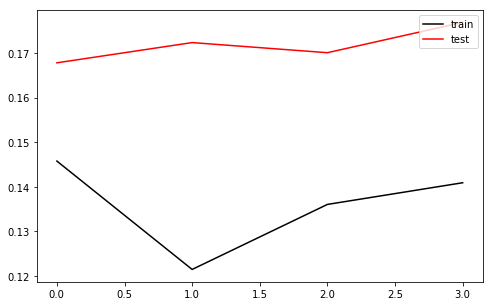

In [ ]:
C_values = [0.01,0.1,1.0,100.0]
prediction_error = []
train_error = []

for C_val in C_values:
    clf = svm.SVC(kernel='linear', C=C_val)
    clf.fit(x_train, y_train)
    score_train = clf.score(x_train, y_train)
    score_test = clf.score(x_test,y_test)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test)
    #val_error.append(1-score_val) 
    print("Acc Train: %f, Acc Test:%f"%(score_train,score_test))
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='test')
plt.legend(loc=1)
plt.show()

### Running different kernels in combination to see who has a higher score
Cross validation

In [ ]:
models = (svm.SVC(kernel='linear', C=1),
          svm.SVC(kernel='rbf', C=1),
          svm.SVC(kernel='rbf', gamma=10, C=1),
          svm.SVC(kernel='sigmoid', C=1, gamma=0.1, coef0=0.25),
          svm.SVC(kernel='poly', degree=3, gamma=0.5, coef0=0.25, C=1))

X_train_s, X_val, Y_train_s, Y_val = train_test_split(x_train, y_train, test_size=0.3)

for idx,model in enumerate(models):
    model.fit(X_train_s,Y_train_s)
    tr_error = 1-model.score(X_train_s,Y_train_s)
    val_error = 1-model.score(X_val,Y_val)
    ts_error = 1-model.score(x_test,y_test)
    print("Model:%d, Train Error:%f, Val Error:%f, Test Error:%f"%(idx,tr_error,val_error,ts_error))

Model:0, Train Error:0.147222, Val Error:0.148867, Test Error:0.167800
Model:1, Train Error:0.000000, Val Error:0.161812, Test Error:0.174603
Model:2, Train Error:0.000000, Val Error:0.161812, Test Error:0.174603
Model:3, Train Error:0.152778, Val Error:0.161812, Test Error:0.174603


#### Had to break it

### Model 1

In [8]:
clf = svm.SVC(kernel='linear', C=1) # SVC stands for support vector classification
clf.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

57
['age', 'businesstravel', 'dailyrate', 'degree', 'department_human', 'department_research', 'department_sales', 'development', 'director', 'distancefromhome', 'education', 'educationfield_human', 'educationfield_life', 'educationfield_marketing', 'educationfield_medical', 'educationfield_other', 'educationfield_technical', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'executive', 'gender_female', 'gender_male', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole_healthcare', 'jobrole_human', 'jobrole_laboratory', 'jobrole_manager', 'jobrole_manufacturing', 'jobrole_research', 'jobrole_sales', 'jobsatisfaction', 'maritalstatus_divorced', 'maritalstatus_married', 'maritalstatus_single', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'representative', 'resources', 'sciences', 'scientist', 'stockoptionlevel', 'technician', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebala

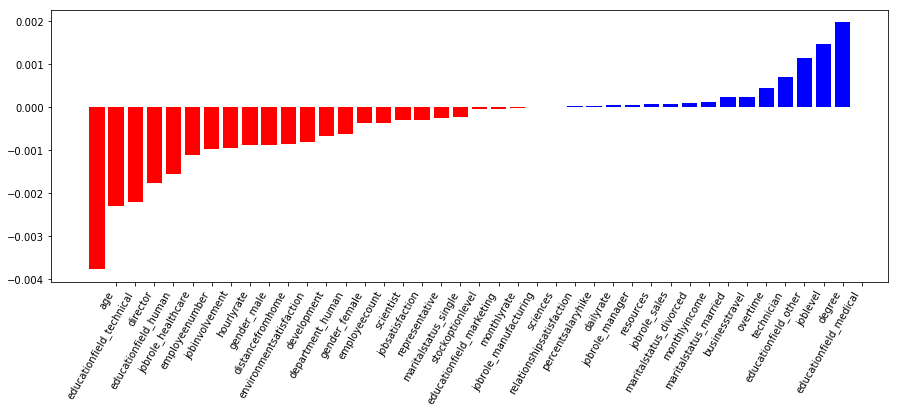

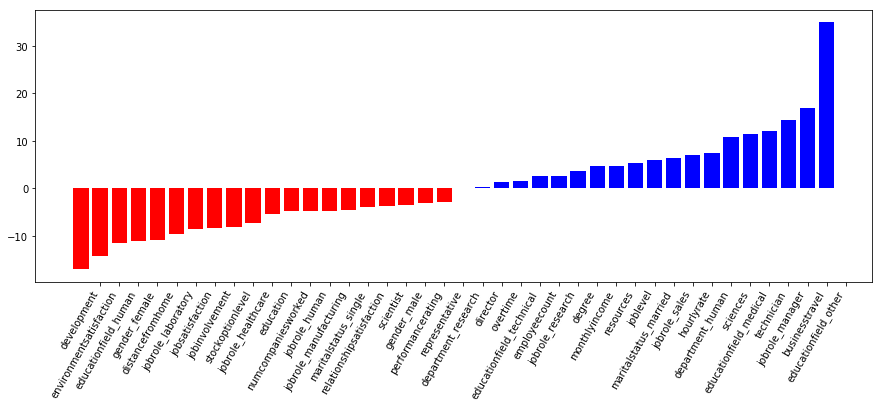

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()

from sklearn.svm import LinearSVC
cv = CountVectorizer()
cv.fit(x_train)
print (len(cv.vocabulary_))
print (cv.get_feature_names())
svm = LinearSVC()
svm.fit(x_train, y_train)
plot_coefficients(svm, cv.get_feature_names())
plot_coefficients(clf,cv.get_feature_names())

In [13]:
start_time = time.time()

model=clf
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

True         0   1
Predicted         
0          349  74
1            5  13
             precision    recall  f1-score   support

          0       0.83      0.99      0.90       354
          1       0.72      0.15      0.25        87

avg / total       0.80      0.82      0.77       441

0.8208616780045351
Duration: --- 0.00039575497309366864 Minutes ---


### c=1 is a much better value lets try changing the kernel
### Model Attempt 2

In [14]:
start_time = time.time()

clf = svm.SVC(kernel='rbf', C=1) # SVC stands for support vector classification
clf.fit(x_train, y_train)
model=clf

pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

True         0   1
Predicted         
0          363  78
1            0   0
             precision    recall  f1-score   support

          0       0.82      1.00      0.90       363
          1       0.00      0.00      0.00        78

avg / total       0.68      0.82      0.74       441

Duration: --- 0.00464632511138916 Minutes ---


### End Evaluation Metrics

ROC AUC: 0.59


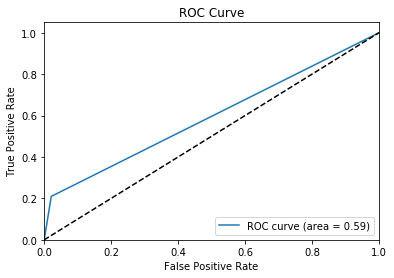

In [26]:
fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [27]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,pred)

0.2606547251389747

#### Lets try it out on smote data

In [3]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('SmoteData_1.csv')
del df['Unnamed: 0']
df.info()
print("==================== Data Loaded In ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

==================== Data Loading ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 51 columns):
Age                                  2465 non-null float64
BusinessTravel                       2465 non-null float64
DailyRate                            2465 non-null float64
DistanceFromHome                     2465 non-null float64
Education                            2465 non-null float64
EmployeeCount                        2465 non-null float64
EmployeeNumber                       2465 non-null float64
EnvironmentSatisfaction              2465 non-null float64
HourlyRate                           2465 non-null float64
JobInvolvement                       2465 non-null float64
JobLevel                             2465 non-null float64
JobSatisfaction                      2465 non-null float64
MonthlyIncome                        2465 non-null float64
MonthlyRate                          2465 non-null float64
NumCompani

In [4]:
train, test = sklearn.cross_validation.train_test_split(df, train_size = 0.7)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(df.columns[1], axis = 1)
x_test=test.drop(df.columns[1], axis = 1)
y_train=train['Attrition']
y_test=test['Attrition']

For Main Data Set : 2465
For Train Set : 1725
For Test Set : 740


True         0    1
Predicted          
0          337  345
1            0   58
             precision    recall  f1-score   support

          0       0.49      1.00      0.66       337
          1       1.00      0.14      0.25       403

avg / total       0.77      0.53      0.44       740

0.5337837837837838
Duration: --- 0.023379222551981608 Minutes ---
ROC AUC: 0.57


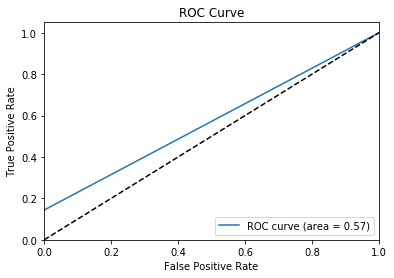

Kappa score is :0.1327889344819153


In [5]:
start_time = time.time()

clf = svm.SVC(kernel='rbf', C=1) # SVC stands for support vector classification
clf.fit(x_train, y_train)
model=clf

pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import cohen_kappa_score
print("Kappa score is :"+str(cohen_kappa_score(y_test,pred)))

#### Based on feature selection part Backward elimination from SAS
###### Not using gender due to GDPR

In [6]:
df=df[["Attrition","BusinessTravel","EducationField_Human Resources","EducationField_Life Sciences","EducationField_Marketing",
      "EducationField_Medical","EducationField_Other","EducationField_Technical Degree","EnvironmentSatisfaction",
      "JobInvolvement","JobLevel","JobRole_Healthcare Representative","JobRole_Human Resources","JobRole_Laboratory Technician",
      "JobRole_Manager","JobRole_Manufacturing Director","JobRole_Research Director","JobRole_Research Scientist",
       "JobRole_Sales Executive","JobRole_Sales Representative","OverTime","RelationshipSatisfaction","StockOptionLevel",
      "WorkLifeBalance","Age","DistanceFromHome","NumCompaniesWorked","TotalWorkingYears","MonthlyIncome"]]

In [8]:

r_state=52
X = df.drop(df.columns[0], axis = 1) # drop the last column
y = df['Attrition'] # drop all the columns but the
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=r_state) # default Train 0.75- Test 0.25
print("There are {} samples in the training dataset".format(x_train.shape[0]))
print("There are {} samples in the testing dataset".format(x_test.shape[0]))
print("Each sample has {} features".format(x_train.shape[1]))
y_train = y_train.values
y_test = y_test.values


There are 1848 samples in the training dataset
There are 617 samples in the testing dataset
Each sample has 28 features


True         0    1
Predicted          
0          291  172
1           11  143
             precision    recall  f1-score   support

          0       0.63      0.96      0.76       302
          1       0.93      0.45      0.61       315

avg / total       0.78      0.70      0.68       617

0.7034035656401945
Duration: --- 0.01777099370956421 Minutes ---
ROC AUC: 0.71


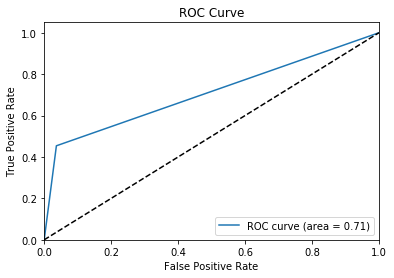

Kappa score is :0.4130010969415605


In [9]:
start_time = time.time()

clf = svm.SVC(kernel='rbf', C=1) # SVC stands for support vector classification
clf.fit(x_train, y_train)
model=clf

pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import cohen_kappa_score
print("Kappa score is :"+str(cohen_kappa_score(y_test,pred)))